In [1]:
!pip install -U imbalanced-learn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.impute import KNNImputer

from imblearn.over_sampling import SMOTE 

In [3]:
# TRABALHO PRÁTICO 1 - Parte 2
# Alunos: Gabriel Sebe Lucchesi Barbosa; Luiz Fernando Oliveira Maciel; Priscila Goulart Carvalho; Thayris Gabriela Ferreira Rodrigues; Vinícius Ferreira Souza

col_names = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']
feature_cols = col_names[:9]

data = pd.read_csv("./cardiovascular.csv", header=0, names=col_names, delimiter=';', encoding='ISO-8859-1')

In [4]:
# Conversão dos valores nominais para numéricos
data = data.values

label_encoder = LabelEncoder()
data[:,4] = label_encoder.fit_transform(data[:,4]).astype('int') 
data = pd.DataFrame(data, columns=col_names)

X = data[feature_cols] # Atributos de entrada
Y = data.chd # Atributo de classificação
Y = Y.astype('int')

In [5]:
# Divisão dos dados de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 80/20
train = pd.concat([X_train, y_train], axis=1, join='inner')

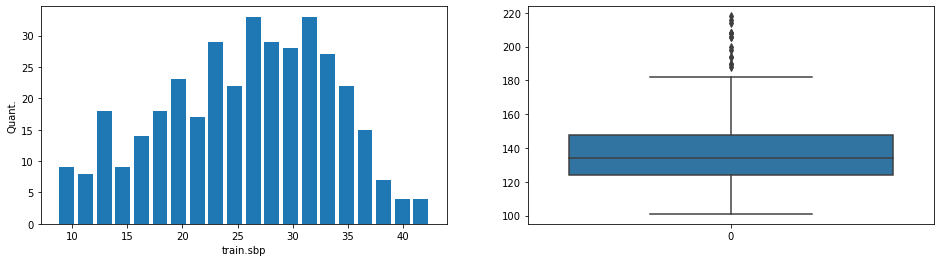

Intervalo Intequartil:  24.0
Limites: 88.0 184.0
Outliers:
     sbp tobacco    ldl adiposity famhist typea obesity alcohol age chd
10   206     6.0   2.95     32.27       0    72   26.81   56.06  60   1
94   194     1.7   6.32     33.67       0    47   30.16    0.19  56   0
161  208    27.4   3.12     26.63       0    66   27.45   33.07  62   1
170  194    2.55   6.89     33.88       1    69   29.33     0.0  41   0
219  208     7.4   7.41     32.03       0    50   27.62    7.85  57   0
229  188     0.0   5.47     32.44       1    71   28.99    7.41  50   1
242  190    4.18   5.05     24.83       0    45   26.09   82.85  41   0
282  206     0.0   4.17     33.23       0    69   27.36    6.17  50   1
314  190    5.15   6.03     36.59       0    42   30.31    72.0  50   0
345  198    0.52  11.89     27.68       1    48    28.4   78.99  26   1
397  218    11.2   2.77     30.79       0    38   24.86   90.93  48   1
403  208    5.04   5.19     20.71       1    52   25.12   24.27  58   1
407  

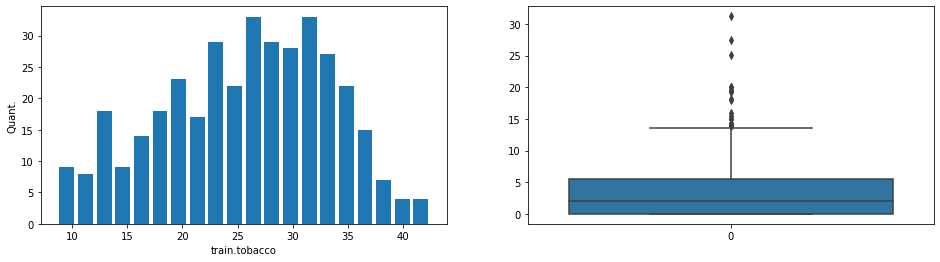

Intervalo Intequartil:  5.4475
Limites: -8.11875 13.67125
Outliers:
     sbp tobacco   ldl adiposity famhist typea obesity alcohol age chd
11   134    14.1  4.44     22.39       1    65   23.09     0.0  40   1
19   124    14.0  6.23     35.96       1    45   30.09     0.0  59   1
24   142    18.2  4.34     24.38       0    61   26.19     0.0  50   0
114  116    31.2  3.17     14.99       0    47    19.4   49.06  59   1
140  160    14.0   5.9     37.12       0    58   33.87    3.52  54   1
149  124    15.5  5.05     24.06       0    46   23.22     0.0  61   1
161  208    27.4  3.12     26.63       0    66   27.45   33.07  62   1
179  108    15.0  4.91     34.65       0    41   27.96    14.4  56   0
186  150    20.0   6.4     35.04       0    53   28.88    8.33  63   0
235  130    18.0  4.13     27.43       0    54   27.44     0.0  51   1
284  148    15.0  4.98     36.94       1    72   31.83   66.27  41   1
306  150    14.4  5.04     26.52       1    60   28.84     0.0  45   0
333  152 

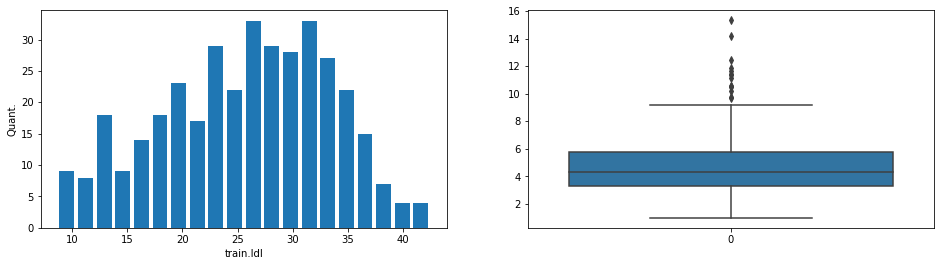

Intervalo Intequartil:  2.5075000000000003
Limites: -0.4787500000000007 9.55125
Outliers:
     sbp tobacco    ldl adiposity famhist typea obesity alcohol age chd
16   120     7.5  15.33      22.0       0    60   25.31   34.49  49   0
25   124     4.0  12.42     31.29       1    54   23.23    2.06  42   1
26   118     6.0   9.65     33.91       0    60    38.8     0.0  48   0
98   122     3.2  11.32     35.36       1    55   27.07     0.0  51   1
115  128     0.0  10.58     31.81       1    46   28.41   14.66  48   0
125  123     8.6  11.17     35.28       1    70   33.14     0.0  59   1
243  144    0.76  10.53     35.66       0    63   34.35     0.0  55   1
345  198    0.52  11.89     27.68       1    48    28.4   78.99  26   1
382  140    1.68  11.41     29.54       1    74   30.75    2.06  38   1
387  148     4.5  10.49     33.27       0    50   25.92    2.06  53   1
404  160    1.15  10.19     39.71       0    31   31.65   20.52  57   0
410  178    20.0   9.78     33.55       0    3

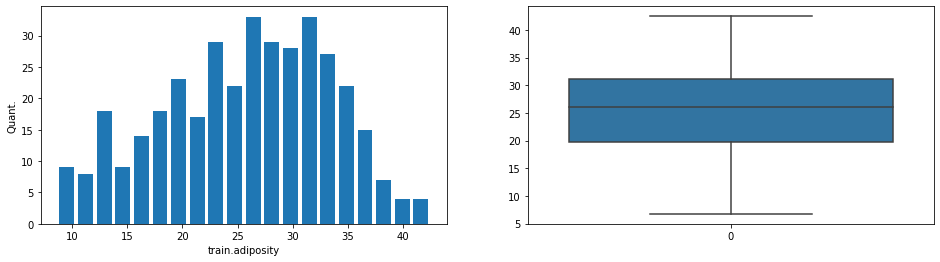

Intervalo Intequartil:  11.4525
Limites: 2.5962499999999977 48.40625
Outliers:
-----


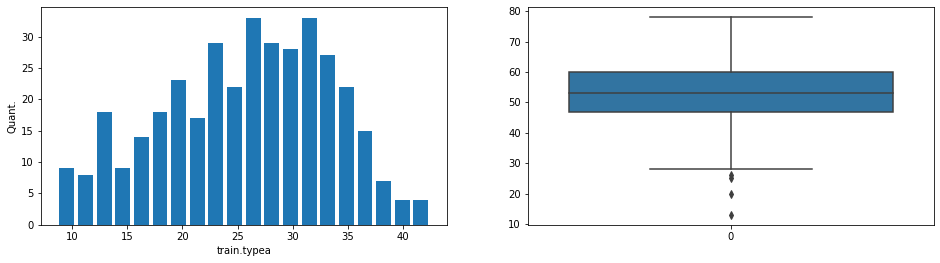

Intervalo Intequartil:  13.0
Limites: 27.5 79.5
Outliers:
     sbp tobacco   ldl adiposity famhist typea obesity alcohol age chd
117  154     0.7  5.91      25.0       0    13    20.6     0.0  42   0
218  114     0.0  4.97      9.69       0    26    22.6     0.0  25   0
336  130    7.28  3.56     23.29       1    20    26.8   51.87  58   1
375  126     0.0  5.29     27.64       0    25   27.62    2.06  45   0
-----


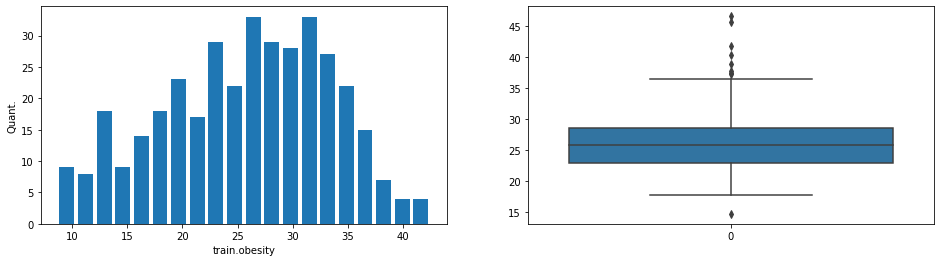

Intervalo Intequartil:  5.512499999999999
Limites: 14.71625 36.76625
Outliers:
     sbp tobacco   ldl adiposity famhist typea obesity alcohol age chd
461  132     0.0  4.82     33.41       1    62    14.7     0.0  46   1
     sbp tobacco   ldl adiposity famhist typea obesity alcohol age chd
26   118     6.0  9.65     33.91       0    60    38.8     0.0  48   0
44   114     0.0  2.99      9.74       0    54   46.58     0.0  17   0
81   140    8.14  4.93     42.49       0    53   45.72    6.43  53   1
107  170     7.6   5.5     37.83       1    42   37.41    6.17  54   1
181  152     0.0  6.06     41.05       1    51   40.34     0.0  51   0
221  164     0.5  6.95     39.64       1    47   41.76    3.81  46   1
271  136     2.2  4.16     38.02       0    65   37.24    4.11  41   1
313  174     0.0  3.27      35.4       0    58   37.71   24.95  44   0
-----


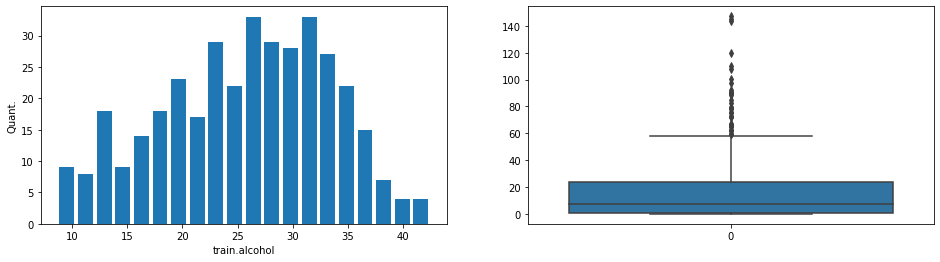

Intervalo Intequartil:  23.382499999999997
Limites: -34.56375 58.966249999999995
Outliers:
     sbp tobacco    ldl adiposity famhist typea obesity alcohol age chd
0    160    12.0   5.73     23.11       1    49    25.3    97.2  52   1
53   134    8.08   1.55      17.5       1    56   22.65   66.65  31   1
55   152    5.99   7.99     32.48       0    45   26.57  100.32  48   0
65   136    7.36   2.19     28.11       1    61    25.0   61.71  54   0
79   108     0.4   5.91     22.92       1    57   25.72    72.0  39   0
105  158     3.6   2.97     30.11       0    63   26.64   108.0  64   0
131  132     2.0   3.08     35.39       0    45   31.44   79.82  58   1
154  124    3.04    4.8     19.52       1    60   21.78  147.19  41   1
155  138     8.8   3.12     22.41       1    63   23.33  120.03  55   1
157  174    9.45   5.13     35.54       0    55   30.71   59.79  53   0
200  124    0.16   2.44     16.67       0    65   24.58   74.91  23   0
230  110    2.35   3.36     26.72       1    

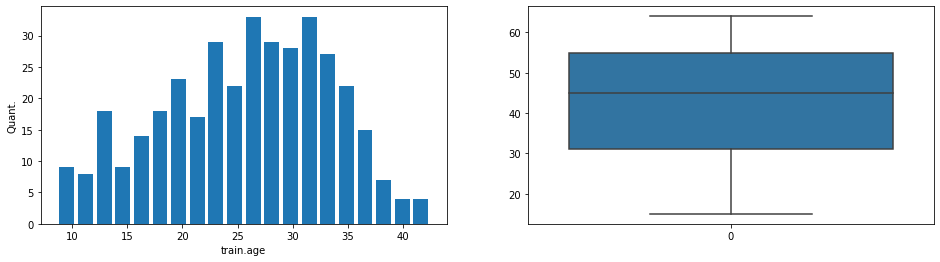

Intervalo Intequartil:  24.0
Limites: -5.0 91.0
Outliers:
-----


In [6]:
def outliers(data, col):
    #print(data.quantile([0.25,0.5,0.75]))
    q1 = np.percentile(data[col].values, 25)
    q3 = np.percentile(data[col].values, 75)
    iqr = q3 - q1
    print("Intervalo Intequartil: ", iqr)
    inf = q1 - 1.5 * iqr
    sup = q3 + 1.5 * iqr
    print("Limites:", inf, sup)
    print("Outliers:")
    if (not data[data[col] < inf].empty):
        print(data[data[col] < inf])
    if (not data[data[col] > sup].empty):
        print(data[data[col] > sup])
               
    

def plotvariable(data, col):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    
    plt.hist(train.adiposity, bins=20, rwidth=0.8)
    plt.xlabel("train." + data[col].name)
    plt.ylabel('Quant.')
    
    plt.subplot(1,2,2)
    sns.boxplot(data=data[col])
    plt.show()
    outliers(data, col)
    print("-----")

plotvariable(data, "sbp")
plotvariable(data, "tobacco")
plotvariable(data, "ldl")
plotvariable(data, "adiposity")
plotvariable(data, "typea")
plotvariable(data, "obesity")
plotvariable(data, "alcohol")
plotvariable(data, "age")

In [7]:
train.shape
print(train.shape)
train = train.drop_duplicates()
print(train.shape)

# Não há inconsistências no dataset

(369, 10)
(369, 10)


In [8]:
y_train = train.chd
X_train = train.drop(columns="chd")

Before oversampling:
 0    236
1    133
Name: chd, dtype: int64


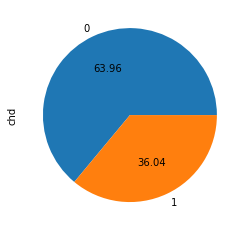

----
After oversampling:
 1    236
0    236
Name: chd, dtype: int64


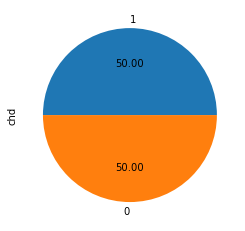

In [9]:
# Balanceamento: Usando Oversampling
print("Before oversampling:\n", y_train.value_counts())
y_train.value_counts().plot.pie(autopct='%.2f')
plt.show()
print("----")

sm = SMOTE(random_state=12)
X_train,y_train = sm.fit_resample(X_train,y_train)

print("After oversampling:\n", y_train.value_counts())
y_train.value_counts().plot.pie(autopct='%.2f')
plt.show()

In [10]:
# Treinamento: Usando Decision Tree
#model = DecisionTreeClassifier()
#model = model.fit(X_train,y_train)

In [15]:
# Treinamento: Usando Random Forest
model = RandomForestClassifier()
model = model.fit(X_train,y_train)

In [16]:
# Teste
y_pred = model.predict(X_test)
print(y_pred)
print(y_test.values)

[0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0]
[0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0]


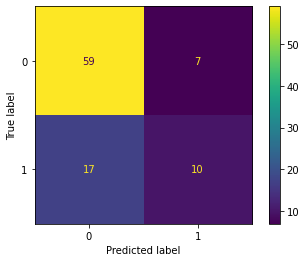

TPR: 0.8939393939393939
FNR: 0.10606060606060606
TNR: 0.13157894736842105
FPR: 0.6296296296296297
Precision: 0.7763157894736842
F1 Score: 0.8309859154929577
Accuracy: 0.7419354838709677


In [17]:
# Matriz de Confusão
matrix = confusion_matrix(y_test.values, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
disp.plot()
plt.show()

# Cálculo das métricas
TP = matrix[0][0]
TN = matrix[1][1]
FP = matrix[1][0]
FN = matrix[0][1]
accuracy = accuracy_score(y_test, y_pred)

print("TPR:", TP/(TP+FN))
print("FNR:", FN/(TP+FN))
print("TNR:", TN/(TP+FP))
print("FPR:", FP/(FP+TN))
print("Precision:", TP/(TP+FP))
print("F1 Score:", (2*TP)/(2*TP+FP+FN))
print("Accuracy:", accuracy)

In [14]:
# Mostrando a árvore
#fig = plt.figure(figsize=(50,30))
#_ = tree.plot_tree(model, feature_names=list(X_train.columns), class_names='conc', filled='true')